<a href="https://colab.research.google.com/github/romenlaw/ML-playground/blob/main/ml_playground3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import graphviz

# Native Bayes Model

it's an important ML model used in classification. It's called 'naive' because we make some assumption to simplify the calculation.

It is based on the premise that the more information we gather about an event, the better estimate of the probability we can make. Bayes' theorem answers "what is the prob of Y given X occured?" - *conditional probability*.

* **prior** - the initial probability
* **event** - something that occurs which gives us information
* **posterior** - the final (and more accurate) probability calculated using prior probability and event.

Example:
* Prior: probability that the patient is sick (1/10,000)
* Event: the patient tested positive
* Posterior: probability that the patient is sick given that he is tested positive (99/(99+9999)=0.98%)

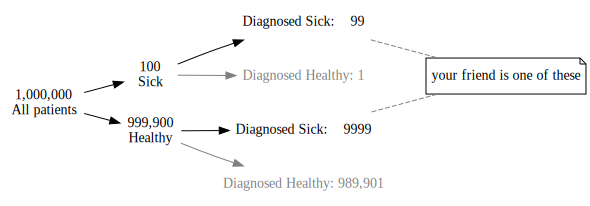

In [ ]:
import graphviz

# Create a new Digraph
dot = graphviz.Digraph(format='svg', graph_attr={'rankdir': 'LR'})

# Add nodes (parent and children)
dot.node('A', '1,000,000\nAll patients', shape='plaintext')
dot.node('S', '100\nSick', shape='plaintext')
dot.node('H', '999,900\nHealthy', shape='plaintext')
dot.node('SDS', 'Diagnosed Sick:    99', shape='plaintext')
dot.node('SDH', 'Diagnosed Healthy: 1', shape='plaintext', fontcolor='grey')
dot.node('HDS', 'Diagnosed Sick:    9999', shape='plaintext')
dot.node('HDH', 'Diagnosed Healthy: 989,901', shape='plaintext', fontcolor='grey')

# Add edges (connections)
dot.edge('A', 'S')
dot.edge('A', 'H')
dot.edge('S', 'SDS')
dot.edge('S', 'SDH', color='grey')
dot.edge('H', 'HDS')
dot.edge('H', 'HDH', color='grey')

dot.node('F', 'your friend is one of these', shape='note')
dot.edge('SDS', 'F', style='dashed', color='grey', arrowhead='none')
dot.edge('HDS', 'F', style='dashed', color='grey', arrowhead='none')
# Display the diagram
dot

In [ ]:
99/(99+9999)  # prob of friend is sick

0.00980392156862745

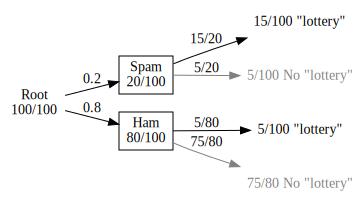

In [ ]:
# the spam email example
g = graphviz.Digraph(format='svg', graph_attr={'rankdir': 'LR'})
g.node('R', 'Root\n100/100', shape='plaintext')
g.node('S', 'Spam\n20/100', shape='box')
g.node('H', 'Ham\n80/100', shape='box')
g.node('SL', '15/100 "lottery"', shape='plaintext')
g.node('SNL', '5/100 No "lottery"', shape='plaintext', fontcolor='grey')
g.node('HL', '5/100 "lottery"', shape='plaintext')
g.node('HNL', '75/80 No "lottery"', shape='plaintext', fontcolor='grey')

g.edge('R', 'S', label='0.2'); g.edge('R', 'H', label='0.8')
g.edge('S', 'SL', label='15/20'); g.edge('S', 'SNL', label='5/20', color='grey')
g.edge('H', 'HL', label='5/80'); g.edge('H', 'HNL', label='75/80', color='grey')

g

In [ ]:
a=[1,2,3,4]
b=[]
b.append([i for i in a if i>2])
b

[[3, 4]]

After eliminating the tree nodes with 'No "lottery"', we calculate the probability that an email is spam given that it contains the word 'lottery' is 15/20=0.75

**Question**: what is the prob that an email that contains the word 'lottery' is spam?

**Rule of complementary probabilities**: For an event E, the complement of event E (denoted $E^c$) is the event opposite to E. The prob of $E^c$ is 1 minus the prob of E:
$$P(E^c)=1-P(E)$$

as an example, P(spam)=20%, P(ham)=1-P(spam)=80%

another example: The prob that a spam email contains 'lottery' is 15/20=0.75. This can be read as: the prob that an email contains 'lottery' given that it's a spam, is 0.75.
* $P('lottery'|spam)=0.75$ : the probability that a spam email contains the word *lottery*
* $P(no 'lottery'|spam)=1-0.75=0.25$ : the probability that a spam email does not contain the word *lottery*.
* $P('lottery'|ham)=\frac{5}{80}=0.0625$ : the probability that a ham email contains the word *lottery*
* $P(no 'lottery'|ham)=1-0.0625=0.9375$ : the probability that a ham email contains the word *lottery*

**Product rule of probabilities** For events E and F, the probability of their intersection is the product of the conditional probability of F given E, times the probability of F, namely,
$$P(E \cap F) = P(E | F) \cap P(F)$$


i.e. we find the probs of 2 events happening at the same time by multiplying the two probs:
1. $P('lottery' \cap spam)=P(spam)\cap P('lottery'|spam)=0.2 \times 0.75 = 0.15$ : The probability that *and* email is spam and contains the word lottery
2. $P(no 'lottery' \cap spam)=P(no 'lottery'|spam)\cap P(spam)=0.25\times 0.2=0.05$ : The probability that *and* email is spam and does not contain the word lottery
3. $P('lottery' \cap ham) = P('lottery'|ham) \cap P(ham)=0.0625\times0.8=0.05$ : The probability that *and* email is ham and contains the word lottery
4. $P(no 'lottery' \cap ham)=P(no 'lottery'|ham)\cap P(ham)=0.9375\times0.8=0.75$ : The probability that *and* email is ham and does not contain the word lottery

The sum of above 4 probs is 1 because they are all the possible scenarios.

Now we want to find $P(spam|'lottery')=?$, i.e. prob that email is spam, given that it contains the word 'lottery'.

From above list, there are 2 scenarios that contain the word 'lottery': $P('lottery' \cap spam)$ and $P('lottery' \cap ham)$, i.e. we only need to consider these 2 branches of the tree. The ratio between the 2 scenarios is 3:1 and they should add up to 1 (because our whole population is emails with 'lottery' only). So
* $P(spam|'lottery')=3/4=0.75$
* $P(ham|'lottery')=1/4=.25$

**Bayes theorum** for events E and F
$$P(E|F)=\frac{P(F|E)\cdot P(E)}{P(F)}
$$
Because event F can be broken down to 2 disjoint events $F|E$ and $F|E^c$, then
$$P(E|F)=\frac{P(F|E)\cdot P(E)}{P(F|E)\cdot P(E)+P(F|E^c)\cdot P(E^c)}
$$

Using Bayes theorum to find P(spam|'lottery'):

$P(spam|'lottery')=\frac{P('lottery'|spam)\cdot P('lottery')}{P('lottery'|spam)\cdot P(spam)+P('lottery'|ham)\cdot P(ham)}
= \frac{0.75\times (\frac{15}{100}+\frac{5}{100})}{0.75\times 0.2+0.0625\times 0.8} = \frac{0.75\times 0.2}{0.75\times 0.2+0.0625\times 0.8} = \frac{0.15}{0.15+0.05} = 0.75
$